In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [181]:
data=pd.read_csv("D:/my_work/python_codes/git_projects/car_insurance_claim_prediction/dataset/train.csv")
test_x=pd.read_csv("D:/my_work/python_codes/git_projects/car_insurance_claim_prediction/dataset/test.csv")
test_y=pd.read_csv("D:/my_work/python_codes/git_projects/car_insurance_claim_prediction/dataset/sample_submission.csv")

In [182]:
test=pd.concat([test_x,test_y.iloc[:,-1]],axis=1)

In [183]:
total_data=pd.concat([data,test],ignore_index=True)
total_data.drop("policy_id",axis=1,inplace=True)

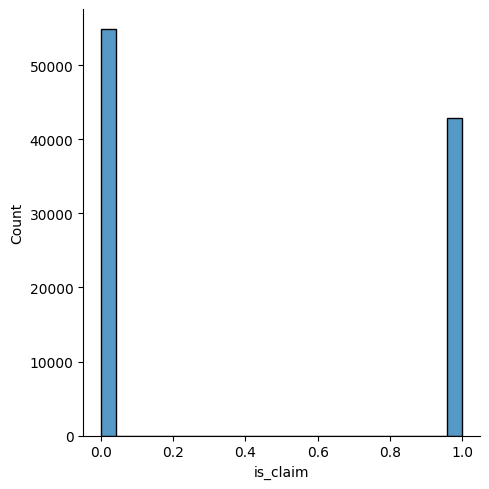

In [184]:
sns.displot(total_data["is_claim"])
plt.show()

In [185]:
total_data.drop(["area_cluster","make","segment","max_torque","max_power",],axis=1,inplace=True)

In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(total_data.iloc[:,:-1],total_data["is_claim"],test_size=0.2)

In [187]:
# from imblearn import over_sampling

# sam=over_sampling.RandomOverSampler()
# x_train,y_train=sam.fit_resample(x_train,y_train)

from imblearn import under_sampling

sam=under_sampling.RandomUnderSampler()
x_train,y_train=sam.fit_resample(x_train,y_train)

In [188]:
y_train.value_counts()

0    34259
1    34259
Name: is_claim, dtype: int64

In [189]:
y_test.value_counts()

0    10979
1     8552
Name: is_claim, dtype: int64

In [190]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

scaler=MinMaxScaler(copy=False)
num_type=x_train.select_dtypes(include="number").columns

x_train[num_type]=scaler.fit_transform(x_train[num_type])
x_test[num_type]=scaler.transform(x_test[num_type])

In [191]:
x_train

,policy_tenure,age_of_car,age_of_policyholder,population_density,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.063501,0.08,0.000000,1.000000,M6,Petrol,K Series Dual jet,0.2,No,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.4
1,0.197813,0.14,0.263889,0.116270,M4,Diesel,1.5 L U2 CRDi,1.0,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,0.6
2,0.329683,0.14,0.333333,0.116270,M6,Petrol,K Series Dual jet,0.2,No,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.4
3,0.456296,0.09,0.069444,0.070003,M4,Diesel,1.5 L U2 CRDi,1.0,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,0.6
4,0.059713,0.02,0.041667,1.000000,M7,Petrol,1.2 L K Series Engine,1.0,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68513,0.772799,0.04,0.500000,0.365231,M6,Petrol,K Series Dual jet,0.2,No,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.4
68514,0.727102,0.03,0.111111,0.365231,M4,Diesel,1.5 L U2 CRDi,1.0,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,0.6
68515,0.811311,0.09,0.611111,0.102516,M4,Diesel,1.5 L U2 CRDi,1.0,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,0.6
68516,0.585435,0.04,0.222222,0.470987,M1,CNG,F8D Petrol Engine,0.2,No,No,...,No,No,No,No,Yes,No,No,No,Yes,0.0


In [192]:
x_test

,policy_tenure,age_of_car,age_of_policyholder,population_density,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
84546,0.751364,0.10,0.055556,0.070003,M4,Diesel,1.5 L U2 CRDi,1.0,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,0.6
22450,0.458749,0.05,0.111111,0.079601,M8,CNG,K10C,0.2,No,No,...,No,No,Yes,Yes,Yes,No,No,Yes,Yes,0.4
3140,0.371746,0.16,0.000000,0.365231,M6,Petrol,K Series Dual jet,0.2,No,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.4
31592,0.349679,0.11,0.055556,0.116270,M4,Diesel,1.5 L U2 CRDi,1.0,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,0.6
44743,0.544746,0.16,0.180556,0.174474,M4,Diesel,1.5 L U2 CRDi,1.0,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89697,0.006584,0.01,0.444444,0.365231,M1,CNG,F8D Petrol Engine,0.2,No,No,...,No,No,No,No,Yes,No,No,No,Yes,0.0
21590,0.686545,0.07,0.125000,0.239459,M8,CNG,K10C,0.2,No,No,...,No,No,Yes,Yes,Yes,No,No,Yes,Yes,0.4
89126,0.742851,0.04,0.097222,0.471712,M6,Petrol,K Series Dual jet,0.2,No,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.4
53531,0.837827,0.04,0.222222,0.116270,M4,Diesel,1.5 L U2 CRDi,1.0,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,0.6


In [193]:
encoder=OrdinalEncoder()
cat_type=x_train.select_dtypes(include="object").columns

x_train[cat_type]=encoder.fit_transform(x_train[cat_type])
x_test[cat_type]=encoder.transform(x_test[cat_type])

In [194]:
x_train

,policy_tenure,age_of_car,age_of_policyholder,population_density,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.063501,0.08,0.000000,1.000000,7.0,2.0,8.0,0.2,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4
1,0.197813,0.14,0.263889,0.116270,5.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.6
2,0.329683,0.14,0.333333,0.116270,7.0,2.0,8.0,0.2,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4
3,0.456296,0.09,0.069444,0.070003,5.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.6
4,0.059713,0.02,0.041667,1.000000,8.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68513,0.772799,0.04,0.500000,0.365231,7.0,2.0,8.0,0.2,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4
68514,0.727102,0.03,0.111111,0.365231,5.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.6
68515,0.811311,0.09,0.611111,0.102516,5.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.6
68516,0.585435,0.04,0.222222,0.470987,0.0,0.0,6.0,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [195]:
x_test

,policy_tenure,age_of_car,age_of_policyholder,population_density,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
84546,0.751364,0.10,0.055556,0.070003,5.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.6
22450,0.458749,0.05,0.111111,0.079601,9.0,0.0,9.0,0.2,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.4
3140,0.371746,0.16,0.000000,0.365231,7.0,2.0,8.0,0.2,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4
31592,0.349679,0.11,0.055556,0.116270,5.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.6
44743,0.544746,0.16,0.180556,0.174474,5.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89697,0.006584,0.01,0.444444,0.365231,0.0,0.0,6.0,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
21590,0.686545,0.07,0.125000,0.239459,9.0,0.0,9.0,0.2,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.4
89126,0.742851,0.04,0.097222,0.471712,7.0,2.0,8.0,0.2,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4
53531,0.837827,0.04,0.222222,0.116270,5.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.6


In [196]:
# from imblearn import over_sampling

# sam=over_sampling.SMOTE()
# x_train,y_train=sam.fit_resample(x_train,y_train)

In [197]:
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import f1_score

regressor=LogisticRegression(max_iter=1000)
regressor.fit(x_train,y_train)
joblib.dump(regressor,"log_reg.pkl")

pred=regressor.predict(x_test)
f1_score(y_test,pred)

0.4873410844289906

In [198]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_train)
predict=classifier.predict(x_test)
from sklearn.metrics import f1_score
print(f1_score(y_train,pred))
print(f1_score(y_test,predict))

0.6338248596493746
0.49055193765346433


In [199]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_train)
predict=classifier.predict(x_test)
from sklearn.metrics import f1_score
print(f1_score(y_train,pred))
print(f1_score(y_test,predict))

0.9999854055079613
0.4654289019888711


In [203]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

classifier=XGBClassifier()

clf = GridSearchCV(classifier, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(x_train,y_train)



#test_probs = clf.predict_proba(test[features])[:,1]


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[20:26:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_t...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [6], 'min_child_weight': [11],
                         'missing': [-999], 'n_estimators': [5], 'nthread': [4],
                         'objective': ['binary:logistic'], 'seed': [1337],
                         'silent': [1], 'subsample': [0.8]},
             scoring='roc_auc', verbose=2)

In [204]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = regressor,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)
pred=grid_search.predict(x_test)
f1_score(y_test,pred)

c:\Users\dhanu\miniconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dhanu\miniconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dhanu\miniconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\dhanu\miniconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 54

0.4873410844289906

In [208]:
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]



grid_search = GridSearchCV(estimator = regressor,  
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)


#grid_search.fit(x_train, y_train)
pred=grid_search.predict(x_test)
f1_score(y_test,pred)

c:\Users\dhanu\miniconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\dhanu\miniconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\dhanu\miniconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\dhanu\miniconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\dhanu\m

0.4873410844289906